# **5.1 1차원 입력 직선 모델**



>> 분류=특정클래스 / 회귀=연속형 실수







*   지도학습='회귀'와 '분류' 의 문제

*   입력에 대해 연속적인 값을 대응시키는 문제를 다루는 단원




> 5.1 1차원 입력 직선 모델





*   나이 x,키 T,인원수 N(N=16) ->x=입력데이터, t=목표데이터

*   $x_n$=입력변수, $t_n$=목표변수(대상)

*   n은 각 개인을 나타내는 데이터의 인덱스 
목적=데이터베이스에 없는 사람의 나이에 대해 그 사람의 키 t를 예측하는 것





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=1) # 난수고정
X_min = 4 # X의 하한
X_max = 30 # X의 상한
X_n = 16 #16명의 나이x를 
X = 5 + 25 * np.random.rand(X_n) #임의로 결정
Prm_c = [170, 108, 0.2] # 생성 매개 변수
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) \
+ 4 * np.random.randn(X_n) #X(입력데이터)에서 T(목표데이터)를 결정하는 부분
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T) #생성한 데이터를 'ch5_data.npz'에 저장

In [ ]:
print(X) #x의 내용

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [ ]:
print(np.round(X, 2)) #np.round함수를 사용해 소수점 둘째자리까지만 표현

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [ ]:
print(np.round(T, 2)) #np.round함수를 사용해 소수점 둘째자리까지만 표현

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


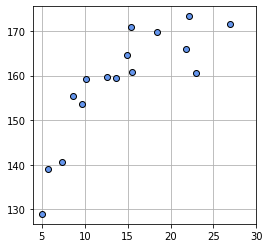

In [ ]:
#X와 T를 그래프로 표시
plt.figure(figsize=(4, 4))
plt.plot(X, T, marker='o', linestyle='None',markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()



> 5.1.1 직선 모델





*   위에그린 데이터는 고르지않기 때문에, 새로운 나이데이터에 키를 정확히 맞추기는 불가능하다
*   하지만 어느정도 오차를 허용해 주어진 데이터에 직선을 그어 그럴듯하게 예측해보자



$$y(x)=w_0x +w_1$$



*   기울기를 나타내는 $W_0$과 절편을 나타내는 $W_1$에 적당한 값을 넣으면 다양한 위치와 기울기의 직선을 만들수 있다.
*   위 수식 해석=입력 x에 y(x)를 출력하는 함수 = y(x)는 x에 대한 t의 예측치

*   위와 같은 직선 모델에서 직선이 데이터에 부합하려면 어떻게해야하는가?







> 5.1.2 제곱오차함수



>> 회귀 측정 지표의 종류
1.   MSE(평균제곱오차)
단점=특잇값에 민감(이상한 값에 제곱까지 하므로 오차가 더 크게 측정될 수 있음)
2.   MAE(평균절대오차)
특잇값에 MSE보다 강한편
3.   RMSE(평균제곱오차에 루트)
가장 많이 사용하는 지표
...이 외에도 다양하게 있음





*   데이터에부합하도록! 오차J를 정의




$$ J= \frac{1}{N}\displaystyle\sum_{i=1}^{n-1} (y_n-t_n)^2$$



*   $y_n$은 직선모델에 $x_n$을 넣었을 때의 출력을 나타낸다




$$y_n =y(x_n)=w_0x_n + w_1$$



*   J는 평균 제곱오차(MSE)로 "직선"과 "데이터 점"의 차의제곱의평균이다.

*   오차의 크기가 N에 의존하지않는것은 MSE!
*   cf.N으로 나누지않는 제곱합계오차(sum of squares error)도 있다.


*   $w_0$과 $w_1$을 결정하면 그에 대한 MSE=J를 계산할 수 있다

*   어떤 $w_0$과 $w_1$쌍의 직선은 데이터에서 벗어나 J가 커질수도, 데이터에가까워,J가 작아질수도있다.
*   중요한것은 어떤 $w_0$과 $w_1$를 선택하더라도 데이터가 직선상에 나란히 있지않기 때문에 J가 완전히 되지는 않는다는 것이다!

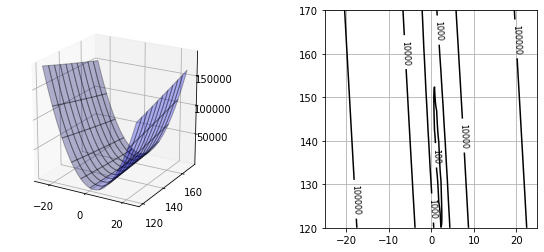

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def mse_line(x, t, w):#평균 오차 함수
    y = w[0] * x + w[1] #y(x_n)=w_0x_n + w_1$$
    mse = np.mean((y - t)**2) #오차를 뺀뒤에 제곱하고 평균구하기
    return mse

xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3,color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)
plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors='black',levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()


왼쪽그래프

*   W공간에서의 MSE는 마치 계곡과 같은 모양

*   범위($w1=120에서170$) ($w0= -25에서25$)

오른쪽그래프

*   $w_0=3$,$w_1=135$ 근처에서 J가 최솟값을 취할것으로 예상됨





> 5.1.3 매개변수구하기(경사하강법)





*   J가 가장 작아지는 w0,w1은 어떻게 구할까? "경사하강법"
*   w0 과 w1을 J가 가장 감소하는 방향으로 조금씩 진행->반복->그릇의바닥도착




*   J를 w0과 w1으로 편미분한 벡터=J의 "기울기"
*   J를 최소화하려면 J의 기울기의 반대방향으로 진행!->양수의 기울기가 0이 되려면 음수의 방향으로 나아가야한다.

*   이와 같이 W의 갱신(학습방법)을 행렬 표기로 하면 다음과 같다.



$$w(t+1) =w(t)-α∇_wJ|_{w(t)}$$



*   $∇wJ$는 w의 함수이다.

*   w에 현재w값 w(t)를 대입한것이 $∇_wJ|_{w(t)}$이다.
*   α= 학습률이라고 불리는 양수값을 취하는 "매개변수", "w의 갱신폭 조절"역할


*   α가 클수록 갱신은 커지지만 학습은 어려워지므로 적당히 줄여야한다.

학습률
*   학습률이 너무 작을 경우 알고리즘이 수렴하기 위해 반복해야 하는 값이 많으므로 학습 시간이 오래걸린다.지역 최소값(local minimum)에 수렴할수도있다.
*   학습률이 너무 클 경우 학습 시간은 적지만, 스텝이 너무 커서 전역 최소값(global minimum)을 가로질러 반대편으로 건너뛰어 최소값에서 멀어질 수도 있다.




In [ ]:
def dmse_line(x, t, w): #기울기를 계산하는 함수
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y - t) * x)
    d_w1 = 2 * np.mean(y - t)
    return d_w0, d_w1 #인수데이터(x,t)및 매개변수(w)를 전달하면 w의 기울기 d_w0, d_w1를 돌려줌

In [ ]:
#w=[10,165]의 기울기를 구해보자
d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

[5046.3  301.8]



위의 결과 해석
*   둘다 꽤 큰 기울기가 나왔다. w0방향의기울기가 w1보다 크다
*   이제 dmse_line을 사용한 경사하강법을 구현하자!



반복 횟수 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


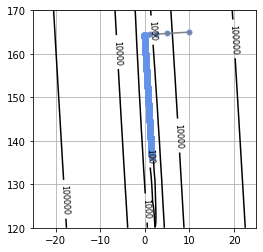

In [ ]:
def fit_line_num(x, t): #x와t를 인수로 해서 mse_line을 최소화하는 w를 돌려줌
    w_init = [10.0, 165.0] #w 시작
    alpha = 0.001 #갱신단계의 폭이 되는 = 학습률
    i_max = 100000 # 반복 최대 수
    eps = 0.1 # 반복을 종료 기울기의 절대 값의 한계
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i - 1])
        w_i[i, 0] = w_i[i - 1, 0] - alpha * dmse[0]
        w_i[i, 1] = w_i[i - 1, 1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps: #w가 평평한곳(기울기가 충분히 적어지면) 갱신종료, np.absolute는 절대치
            break #기울기의 각 요소의 절대값이 eps=0.1보다 작으면 for문에서 break
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i

plt.figure(figsize=(4, 4)) # MSE의 등고선 
xn = 100 # 등고선 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8) 
plt.grid(True)
W0, W1, dMSE, W_history = fit_line_num(X, T)

#결과확인
print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',
         color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()



위 그래프 해석
*   평균제곱오차 J의 등고선위에 w의 모습이 푸른선으로 표시
*   시작지점 w_init =[10.0,165.0]
종료지점 w=[1.53,136.2]


*   그러면 구해놓은 w0과w1은 정말 데이터에있는 절편과 기울기가 되는것인가? 그래프를 그려보자





w0=1.540, w1=136.176
SD=7.002 cm


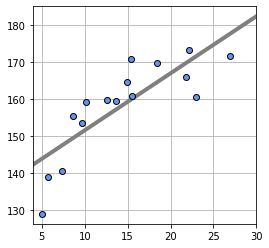

In [ ]:
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)

plt.figure(figsize=(4, 4))
W=np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0={0:.3f}, w1={1:.3f}".format(W0, W1))
# mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W) 
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black') 
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


그래프 해석
*   경사하강법에 의한 직선모델 fitting결과=데이터와 완전일치하지는않지만 적절한 곳에 위치함
*   그렇다면 데이터와 얼마나 차이가 나는것인가? $MSE=49.03cm^2$였다. 
*   원래 오차로 복원하기 위해 제곱근을 취함 $\sqrt{49.03}=7cm$이다
*   이 평균오차의 제곱근=표준편차(standard deviation,SD)라고 한다.
*   오차가 대략 7cm이다=오차가 정규분포를 따른다고 했을 때 전체 68%데이터 점에서 오차가 7cm 이하다.(정규분포의 경우 SD의 범위에 68%가 들어감)

경사하강법의 주의할점
*   경사하강법으로 구해지는 해는 어디까지나 "극솟값"
전체의 "최솟값"은 아니라는 것이다.
*   J가 복잡한 모양인 겨우 최소제곱법으로는 초기값 근처의 함몰 지점에 수렴하게 되는 문제가 발생할 수도 있다는 것이다. ->이를 방지하기 위해서 다양한 초기값에서 경사하강법을 여러번 시도하는 근사적인 방법도 생각해볼 수 있다.

우리의 예제는?
*   J가 w0과w1의 2차함수기 때문에 J는 함몰이 하나밖에 없는 그릇형이 보장되서 잘 찾은 것이다.->어떤 초기값에서 시작하더라도 학습률만 적절하게 선택하면 언제나 전체의최솟값으로 수렴하는 "그릇형"












> 5.1.4 선형 모델 매개 변수의 해석해





*   앞서 경사하강법은 "수치계산법"(반복계산에의해 근사값을 구하므로)에 의해 나온 "수치해"찾는 풀이

*   직선모델의 경우 이와같은 근사적 해석 말고 방정식을 해결해서 정확한 해를 구할 수 있다. 이런 경우를 "해석해"라고 한다.

해석해의 장점
*   1회 계산으로도 최적의 W를 구할 수있다.
*   계산시간도 빠르고 답도 정확하다.

*   문제의 본질을 잘 이해할 수 있다
*   다차원 데이터에 대응하며, 곡선모델로 확장하기도 좋다.

그렇다면 이와같이 목표에 대한 방정식을 해결해 "해석해를 구해보자





$ \frac{\partial J}{\partial W_0}= \frac{2}{N}\displaystyle\sum_{N=0}^{N-1} (w_0x_n + w_1 -t_n)*x_n=0$

를 깔끔하게 정리하면 
$w_0<x^2> + w_1<x>-<tx>=0$

$ \frac{\partial J}{\partial W_0}= \frac{2}{N}\displaystyle\sum_{N=0}^{N-1} (w_0x_n + w_1 -t_n)=0$

를 깔끔하게 정리하면
$w_0<x^2> + w_1<x>-<tx>=0$

이후에 두식을 연립방정식으로 풀어 w0과 w1을 구한다

$$w_0 = \frac{<tx>-<t><x>}{<x^2> - <x>^2}$$

$$w_1 = <t> - \frac{<tx>-<t><x>}{<x^2> - <x>^2}<x>$$

w0=1.558, w1=135.872
SD=7.001 cm


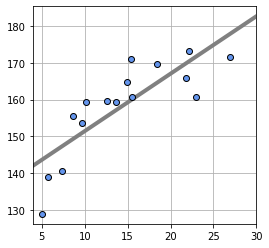

In [ ]:
def fit_line(x, t): 
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t * x)
    mxx = np.mean(x * x)
    w0 = (mtx - mt * mx) / (mxx - mx**2)
    w1 = mt - w0 * mx
    return np.array([w0, w1])

W = fit_line(X, T)
print("w0={0:.3f}, w1={1:.3f}".format(W[0], W[1]))
mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.figure(figsize=(4, 4))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()




*   직선으로 피팅한다면 해석해를 도출가능->경사하강법 사용필요X
*   경사하강법은 해석해가 구해지지X->이럴때 유용



>>질문:왜 최대값이 아닌 최솟값으로만 경사하강법이 수렴하는가?? 경사상습법이라고 최대값 구하는거 따로 존재.. 제시된 함수의 기울기로 최소값을 찾아내는 머신 러닝 알고리즘


# **5.2 2차원 입력면 모델**



$$몸무게 =23 * \frac{키^2}{100}+노이즈$$

In [ ]:
#2차원 데이터 생성
X0 = X 
X0_min = 5
X0_max = 30
np.random.seed(seed=1) # 난수를 고정
X1 = 23 * (T / 100)**2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75

In [ ]:
#print
print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


In [ ]:
#16명의 x0,x1,T가 생성된다. 3차원 플롯의 그래프 표시

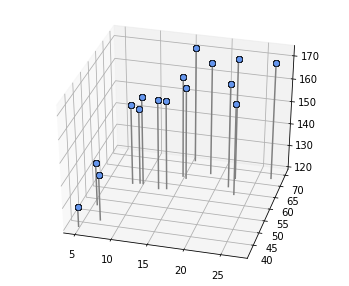

In [ ]:
# 2차원 데이터
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]],
                [120, t[i]], color='gray')
        ax.plot(x0, x1, t, 'o',
                color='cornflowerblue', markeredgecolor='black',
                markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)

plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)
plt.show()



그래프 해석
*   나이가 많아질수록, 몸무게가 증가할수록 키가 커진다.





> 5.2.1 데이터의 표시 방법





*   데이터 번호 = n, 벡터의 요소(0=나이,1=몸무게),요소 번호 = m




$$x_n =[x_{n,0},x_{n,1}]$$



> 5.2.2 면 모델





*   N개의 2차원 벡터 $X_n$에 대해 각각 $T_n$이 할당되어있으므로 각각의 축에서 $X_{m=0},X_{m=1}$그리고 t를 나타내는 3차원 플롯이 편하다.
*   임의의 W에 대해 면을 그리는 함수 show_plane(ax,W)를 준비



SD=12.876 cm


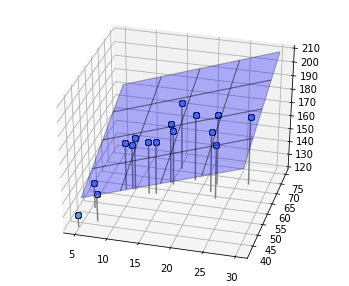

In [ ]:
#면의 표시 
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0]*px0 + w[1] * px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3,
                    color='blue', edgecolor='black') 

##평균제곱오차 계산함수, 면의 MSE 
def mse_plane(x0, x1, t, w): 
    y = w[0] * x0 + w[1] * x1 + w[2] # (A)
    mse = np.mean((y - t)**2)
    return mse
 
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90]
show_plane(ax, W) 
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()


$$y(x) =w_0x_0 + w_1x_1 + w_2$$



*   데이터에 따른 면을 그리면 새로운 나이와 몸무게, 데이터에 대해 키를 예측할 수 있다.

*   이 면의 함수는 윗 식과 같다. 이 함수는 x0과 x1의 쌍에 대해 y를 결정할 수 있다. 이작업반복->점의 집합=평평한 표면 형성 








> 5.2.3 매개변수의 해석해





*   데이터에 적합한 w=[w0,w1,w2]를 구해보자




$$J= \frac{1}{N}\displaystyle\sum_{N=0}^{N-1} (y(x_n)-t_n)^2=\frac{1}{N}\displaystyle\sum_{N=0}^{N-1} (w_0x_{n,0}+w_1x_{n,1}+w_2-t_n)^2$$



*   W를 움직이면 면이 여러방향을 향함->이에 따라 J가 변화

*   목표=J가 가장 작아지는 w=[w0,w1,w2]를  구하는것
*   J를 최소화하는 최적의 W는 기울기가 0인 아주작은 W의 변화에 대해서 J의 변화는 0이기 때문에 


*   J를 $W_0$으로 편미분한것=0, $W_1$으로 편미분한것=0,$W_2$으로 편미분한것=0



$$\frac{\partial J}{\partial w_0}=0,\frac{\partial J}{\partial w_1}=0,\frac{\partial J}{\partial w_2}=0$$

w0,w1,w2에 대한 편미분을 바탕으로 꾸준히 풀면 다음 3식을 얻을 수있다.

$$W_0 = \frac{cov(t,x_a)cov(x_0,x_a)-var(x_1)cov(t,x_0)}{cov(x_0,x_1)^2 - var(x_0)var(x_1)}$$

$$W_1 = \frac{cov(t,x_a)cov(x_0,x_a)-var(x_1)cov(t,x_1)}{cov(x_0,x_1)^2 - var(x_0)var(x_1)}$$

$$W_2=-w_0<x_0>-w_1<x_1>+<t>$$

여기서
$$a의 분산 = var(a)=<a^2>-<a>^2$$
$$a와 b의 공분산 = cov(a,b)=<ab>-<a><b>$$

w0=0.5, w1=1.1, w2=89.0
SD=2.546 cm


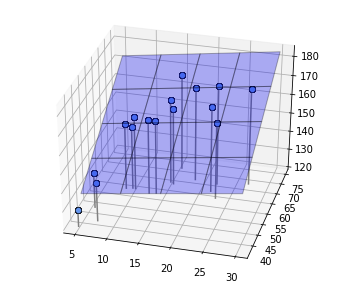

In [ ]:
def fit_plane(x0, x1, t):#해석해
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1**2 - v_x0 * v_x1)
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1**2 - v_x0 * v_x1)
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    return np.array([w0, w1, w2]) 

plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = fit_plane(X0, X1, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()



그래프해석
*   오차의 표준편차SD는 2.55로 저번 선모델인 7보다 작아졌다.
*   키를 예측할때 나이뿐만 아니라 몸무게 정보가 있을때, 예측 정확도가 증가한다.





# **5.3 D차원 선형 회귀 모델**





*   만약 x 가 3,4 그보다 더 큰 차원이라면?






> 5.3.1 D차원 선형 회귀 모델





D차원 선형회귀모델 식
*   $y(x)=w_0x_0 +w_1x_1+...+w_{d-1}x_{d-1}+w_d$

절편을 포함하지않는 모델로 생각
*   $y(x)=w_0x_0 +w_1x_1+...+w_{d-1}x_{d-1}$

이렇게 되면 어떤 W에서도 원점을 대입하면 y=0되어버리므로 어떤 W더라도 원점을 지나는 평면이 그려지게 된다.


*   식은 다음과 같다.





$$y(x)=w_0x_0 +w_1x_1+...+w_{d-1}x_{d-1}+w_d   
=[w_0 ... w_{d-1}]*\begin{pmatrix}
  x_0  \\
  \vdots    \\
  x_{d-1} 
 \end{pmatrix}
 =w^Tx$$



> 5.3.2 매개변수의 해석해



평균제곱오차 J
$$J(w) = {1 \over N} \sum_{k=0}^{N-1} (y(x_{n}) - t_{n})^2 = {1 \over N} \sum_{k=0}^{N-1} (w^Tx- t_{n})^2 $$  

연쇄법칙을 사용해 $W_i$로 미분
$$ {\partial f \over \partial w_{j}}= {1\over N} \sum_{k=0}^{N-1} {\partial f \over \partial w_{j}} (w^Tx_{n} - t_{n})^2 = {2\over N} \sum_{k=0}^{N-1} {\partial f \over \partial w_{j}} (w^Tx_{n} - t_{n})x_{n, i}  $$

양변에 n/2 곱해서 간단한 식으로 만들기
$$ \sum_{k=0}^{N-1} (w^Tx_{n} - t_{n})x_{n, i} (i = 0, 1, \cdots, D-1) $$  



*   지금까지는 d=1,d=2 이런식으로 구체적으로 정해 w를 도출했는데




*   어떻게 하면 d라는 변수의 상태w를 구할 수 있을까?

*   바로 '행렬'을 사용하여!!! 행렬을 사용하면 D는 D인채로 답을 낼 수 있다.



먼저 식 전체를 '벡터'형식으로 정리한다. 
$$ \sum_{N=0}^{N-1} (w^Tx_{n} - t_{n}) \begin{bmatrix} x_{n,0} & x_{n, 1} & \cdots & x_{n,D-1} \end{bmatrix} = \begin{bmatrix} 0 & 0& \cdots & 0 \end{bmatrix}$$

$$\begin{bmatrix} x_{n,0} & x_{n, 1} & \cdots & x_{n,D-1} \end{bmatrix}는  \ x_{n}^T와 같다.$$


$$ \sum_{k=0}^{N-1} (w^Tx_{n} - t_{n})x_{n}^T = \begin{bmatrix} 0 & 0& \cdots & 0 \end{bmatrix}$$

분배법칙으로 확장하고 합을 분해하기
$$ \sum_{N=0}^{N-1} (w^Tx_{n}x_{n}^T - t_{n}x_{n}^T) = x_{n}^T = w^T \sum_{k=0}^{N-1} x_{n}x_{n}^T - \sum_{k=0}^{N-1} t_{n}x_{n}^T$$   


행렬의 식처럼 나타내기
$$  \mathbf w^T \mathbf x^T \mathbf x - \mathbf t^T \mathbf x =  \begin{bmatrix} 0 & 0& \cdots & 0 \end{bmatrix} $$

양변을 전치하고, T를 적용한뒤 양변을 정리하면
해석해(D차원 선형회귀 모델의 해)가 된다.

$$w=(X^TX)^{-1}X^Tt$$



*   x가 어떤 차원이라도 모두 이 형태에서 최적의 W를 얻을 수 있다.
*   위 식의 우변은 무어-펜로즈 의사 역행렬이라고도 한다.





>>참고로 행렬의 식처럼 왜 나타낼까? 직관적으로 선형 회귀모델을 이해할수 있기 떄문이다.





> 5.3.3 원점을 지나지않는 면에 대한 확장



원점에 고정된 면의 방정식은 입력데이터가 2차원인경우
$$y(x)=w_0x_0+w_1x_1$$

여기서 매개변수w2를 더하면 면을 위아래로 이동할수있기때문에 원점을 지나지않는 면을 표현가능하다.
$$y(x)=w_0x_0+w_1x_1 + w_2$$

x는 2차원 벡터였지만, 항상 1을 얻는 3차원의 요소 x2=1을 추가해 x를 3차원벡터라고 생각하자. 그러면 원점에 얽매이지않는 면 표현이 가능하다.

$$y(x)=w_0x_0+w_1x_1 + w_2x_2 =y(x)=w_0x_0+w_1x_1 + w_2$$

D차원의 x문제역시 마찬가지다. D+1번째 차원에서 항상 1을 얻는 요소를 추가하면, 자유롭게 움직이는 모델을 표현할 수 있다!



# **5.4 선형기저함수모델**



>>기저=vector space
$R^n$의 부분공간 V의 벡터들의 집합이 일차독립적이고 부분공간 V를 생성할 수 있다면, 이 집합 V에 대한 vector space라고 볼 수 있다.

>>vector space function?
점과 공간사이의 관계, 일종의 축들로 원래 데이터를 설명(vector space=dimension number,차원의 수)







*   x가 1차원일때 직선모델로 키를 예측했다.. 이번에는 곡선모델로 예측해보자(오차가 더 작아지도록)

*   곡선을 나타내는 여러 모델중 '범용성'이 높은 '선형 기저함수모델'을 사용하자
*   기저함수? 바탕이 되는 함수라는 뜻으로 선형회귀모델의 x를 $\phi(x)$로 나타낸다.



*   여기서는 가우스함수를 기저함수로 선택!why?우리가 사용하는 대부분의 데이터는 가우스함수분포를 따른다.





$$ \phi _j(x) =exp\left(\frac{(x-	\mu_j)^2}{2s^2}\right)$$


>> 기저함수의 장점!
사람이 하나씩 생각해내는 것이 아니라 미리 만들어진 규칙에 의해 자동으로 생성되므로 비선형 함수를 만들기 위해 고민할 필요가 없다.






설계자가 결정하는 매개변수
*   가우스 함수의 중심위치는 $\mu_j$
*   함수의 확장 정도는 s로 조절된다.(s는 모든 가우스 함수의 공통매개변수)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']


In [ ]:
def gauss(x, mu, s):# 가우스 함수
    return np.exp(-(x - mu)**2 / (2 * s**2))


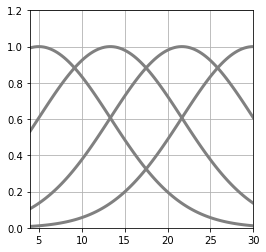

In [ ]:
M = 4  #4개의 가우스함수를
plt.figure(figsize=(4, 4))
mu = np.linspace(5, 30, M)  #나이의 범위 5~30으로 일정한 간격으로 배치하여 표시
s = mu[1] - mu[0] #s는 인접한 가우스 함수 중심 사이의 거리로
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray', linewidth=3)
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()

위 그래프

*   M=4 일때 가우스 기저함수
*   표준편차는 인접한 가우스 함수의 중심거리 (30-5)/3=8.33으로 한다



선형기저 함수모델의 식
$$y(x,w)=w_0\phi_0(x)+w_1\phi_1(x)+w_2\phi_2(x)+w_3\phi_3(x)+w_4$$



*   매개변수 W=가중치 매개변수

*   마지막 w4는 곡선의 상하평행이동을 조절하지만 다른 매개변수와 달리 $Φ_j(x)$가 곱해지지않는다.
*   그래서 항상 1을 출력하는 $\phi _4(x)=1$이라는 dummy 기초함수를 추가할 수 있다.


*   평균제곱오차 J는 다음과같다.



$$J(w) = {1 \over N} \sum_{k=0}^{N-1} (w^Tϕ(x_n) - t_{n})^2 $$

선형기저함수모델은 다음과 같이 해석

*   '전처리'로 1차원 데이터 $x_n$을 M차원의 데이터벡터 $x_n =ϕ(x_n)$로 변환
*   M차원 입력 $X_n$에 대해 선형 회귀 모델을 적용

*   선형 기저 모델은 $ϕ(x_n)를 입력 x_n$으로 해석한 선형 회귀 모델! 과 같다.






*   따라서 J를 최소화 하는 매개변수w는 해석해의 X를 $ϕ$로 대체해서 이렇게 나타낼 수 있다.

$$w=(ϕ^Tϕ)^{-1}ϕ^Tt$$

*   여기서 $ϕ$는 전처리를 한 후 입력데이터를 나타내는 '계획행렬(design matrix)'가 된다.



In [ ]:
def gauss_func(w, x):  # 선형 기저 함수 모델
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x) # x와 같은 크기로 요소가 0의 행렬 y를 작성
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y

In [ ]:
def mse_gauss_func(x, t, w):# 선형 기저 함수 모델 MSE
    y = gauss_func(w, x)
    mse = np.mean((y - t)**2)
    return mse

In [ ]:
def fit_gauss_func(x, t, m):# 선형 기저 함수 모델 정확한 솔루션
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)
    
    
    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


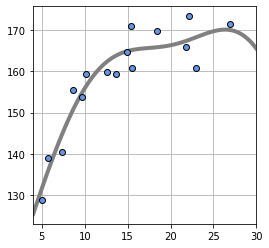

In [ ]:
def show_gauss_func(w): # 가우스 기저 함수 표시
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 

plt.figure(figsize=(4, 4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W='+ str(np.round(W,1)))
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()



*   선형 기저 함수모델의 피팅결과다
*   항상 1을 출력하는 더미함수와 4개의 가우스 기저함수를 합한 결과 이다.


*   데이터에 따라 곡선이 알맞게 그어져있음
*   오차의 표준편차 SD는 3.98cm으로 직선모델때의 오차 7cm 보다 훨씬 줄어들었다.





# **5.5 오버피팅의문제**



*   기저함수의 수 M은 어떻게 정할것인가?충분히 크게하면 어떤 데이터에도 잘 피팅될까?
*   M=2,4,7,9의 선형 기저 함수 모델을 사용하여 피팅을 시도해보자!



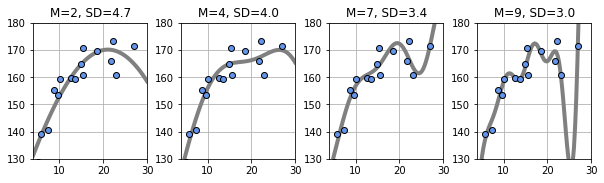

In [ ]:
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]  #M=2,4,7,9
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker='o', linestyle='None',
             color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    mse = mse_gauss_func(X, T, W)
    
    
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()


위 그래프 해석

*   M이 늘어나면 오차의 표준편차 SD는 줄어들지만 가우스 기저함수 자체는 흐물흐물 하게 변한다
*   이렇게 되면 새로운 입력에 대한 예측이 잘 되지않는다 이현상을 "과적합"이라고 한다!



>>과소/과대 적합 구분법
기준= 분산과 편향
분산과 편향이 모두 멀면=과소적합(underfitting)
분산은 가까운데 편향이 멀면=과대적합(overfitting)

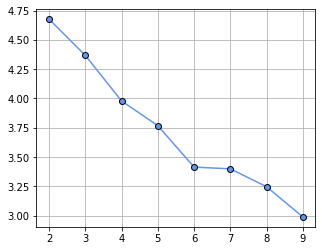

In [ ]:
#M=2~9까지의 SD를 계산하고 플롯하여 정량적으로 확인하자.
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W))
plt.plot(M, mse2, marker='o',
         color='cornflowerblue', markeredgecolor='black')
plt.grid(True)
plt.show()


위 그래프 해석


*   M이 증가하면 오차의 표준편차 SD는 점점 줄어든다
*   이 SD의 최적의 M의 기준은 안된다.


*   이렇게 되면 데이터 점의 오차는 작아져도 새 데이터의 예측은 나빠지는 모델의 'overfitting'이 발생한다.
*   그렇다면 어떻게 최적의 M을 찾아야하는가?




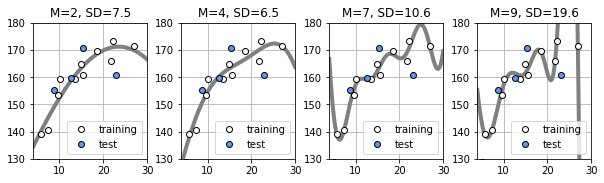

In [ ]:
#훈련 데이터와 테스트 데이터
X_test = X[:int(X_n / 4 + 1)]
T_test = T[:int(X_n / 4 + 1)]
X_train = X[int(X_n / 4 + 1):]
T_train = T[int(X_n / 4 + 1):]

plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker='o',
             linestyle='None', color='white',
             markeredgecolor='black', label='training')
    plt.plot(X_test, T_test, marker='o', linestyle='None',
             color='cornflowerblue',
             markeredgecolor='black', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    mse = mse_gauss_func(X_test, T_test, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

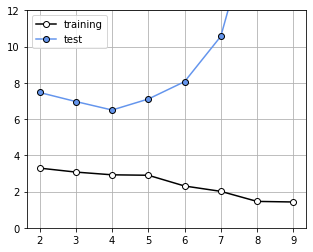

In [ ]:
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M)) 
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
plt.plot(M, mse_train, marker='o', linestyle='-',
         markerfacecolor='white', markeredgecolor='black',
         color='black', label='training')
plt.plot(M, mse_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black',
         label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 12)
plt.grid(True)
plt.show()

위 그래프 해석

*   M이 늘어나면 훈련데이터의 오차는 평이하게 감소하지만, 테스트데이터의 오차는 M=5부터 증가
*   M=5일때 오버피팅이 일어나고있으며, 이번 호드아웃 검증에서는 M=4일 경우 가장 데이터에 적합하다 판단



K겹 교차검증(k-fold cross validation)


*   데이터X와 t를 K개로 분할하여 첫번째데이터를 테스트 나머지를 훈련데이터로 사용
*   훈련데이터로 모델M의 매개변수를 구하고, 이 매개변수를 사용해 테스트데이터에서 평균제곱오차를 계산->위 과정 k회반복

*   마지막에 K개의 평균제곱오차의 평균을 계산하여 이 숫자를 M의 평가값으로 함
*   최대분할수 K=N / 테스트데이터의크기=1





In [ ]:
def kfold_gauss_func(x, t, m, k):#데이터를 K 분할하여 각각의 평균 제곱 오차를 출력하는 함수
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
      #(A)에서 사용되는 함수 np.fmod(n,k)는 n을 k로 나눈 나머지를 출력
        x_train = x[np.fmod(range(n), k) != i] # (A)
        t_train = t[np.fmod(range(n), k) != i] # (A)
        x_test = x[np.fmod(range(n), k) == i] # (A)
        t_test = t[np.fmod(range(n), k) == i] # (A)
        wm = fit_gauss_func(x_train, t_train, m)
        mse_train[i] = mse_gauss_func(x_train, t_train, wm)
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
    return mse_train, mse_test

In [ ]:
#0부터 4까지 반복하는 10개의요소를 가진 리스트 생성
np.fmod(range(10),5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [ ]:
#기저의 수 M=4와 K=4로 실행
M = 4
K = 4
kfold_gauss_func(X, T, M, K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782018,  18.30921743,  47.52459642]))



*   위쪽이 각각 분할에서 훈련데이터의 평균제곱오차
*   아래쪽이 테스트데이터에서 평균제곱오차





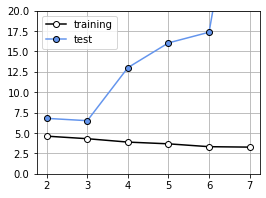

In [ ]:
M = range(2, 8) #2~7까지의 M으로 오차평균을 계산
K = 16  #분할 수=최대 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] =\
                    kfold_gauss_func(X, T, M[i], K) #kfold_gauss_func 함수로 계산
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))


plt.figure(figsize=(4, 3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-',
         color='k', markerfacecolor='w', label='training')
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

위 그래프 해석


*  M=3일때, 테스트 데이터의 오차가 가장 작은 것을 알 수 있음(참고로 훈련 데이터의 오차는 M이 증가하면 줄어든다)
*   LOOCV에서는 M=3이 가장 적합하다는 결론(M>3 에서 overfitting 발생)


*   홀드 아웃검증과는 다르지만, 그보다 신뢰할 수 있는 결과라고 볼 수있음





SD=4.37 cm


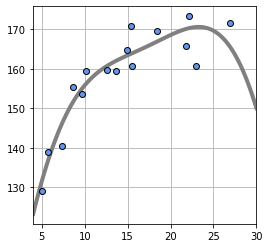

In [ ]:
# 리스트 5-2-(16)
M = 3
plt.figure(figsize=(4, 4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()



*   교차검증은 M을 구하기위한방법(모델 매개변수W를 구하는 용도가 아님)
*   최적의 M=3임을 아는 상태로, 매개변수w를 모든 데이터를 사용해 마지막으로 계산

*   위와같이 테스트데이터(N=16)처럼 데이터 수가 작은 경우에는 교차검증이 유용하다. 하지만 데이터수가 많으면 계산에 시간이 많이 걸린다
*   이 경우 홀드 아웃 검증을 사용하면 좋을 것이다

*   데이터 수가 크면 홀드아웃 검증결과가 교차검증과 비슷하게 될 것이다.







>>hold out(홀드아웃)
data를 train/test로 나눔
train으로 모델 훈련
valid로 성능 검증
test로 모델 평가!

# **5.6 새로운 모델의 생성**



*   앞서 선형기저모델을 통해 데이터와의 오차가 많이 개선되었지만 여전히 그래프에는 문제가 있다(25세가 되면 갑자기 키가 줄어듦,현실에는 있을 수 없는 일)
*   why?30세 주위의 데이터가 충분하지 않아서..

*  '키가 나이가 들면서 점차 커지고 일정한 곳에 수렴한다'는 지식을 모델에 추가하려면 어떻게 해야하는가..?
*   ->지식에 해당하는 모델을 만들면됨. 나이x가 증가함에 따라 키가 점차 증가하고 결국에는 일정한 값으로 수렴하는 함수는 아래와 같다





$$y(x)=w_0 -w_1exp(-w_2x)$$



*   w0,w1,w2는 모두 양의 값을 취하는 매개변수, 이함수를 모델 A라고 하자
*   x가 증가하면exp(-w2x)는 0에 접근한다.
(그 결과 1항의 w0만 값을 갖게된다,x가 증가하면 y는 w0에 가까워진다)
*   w0은 수렴하는 값을 결정하는 매개변수
*   w1은 그래프의 시작점을 결정하는 매개변수

*   w2는 그래프의 기울기를 결정하는 매개변수






In [ ]:
def model_A(x, w):#모델 A
    y = w[0] - w[1] * np.exp(-w[2] * x)
    return y 

def show_model_A(w):# 모델 A 표시
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 

def mse_model_A(w, x, t):# 모델 A의 MSE
    y = model_A(x, w)
    mse = np.mean((y - t)**2)
    return mse

In [ ]:
from scipy.optimize import minimize 
def fit_model_A(w_init, x, t):# 모델 A의 매개 변수 최적화
    res1 = minimize(mse_model_A, w_init, args=(x, t), method="powell")
    return res1.x

w0=169.0, w1=113.7, w2=0.2
SD=3.86 cm


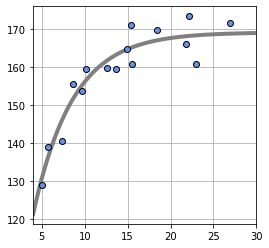

In [ ]:
plt.figure(figsize=(4, 4))
W_init=[100, 0, 0]
W = fit_model_A(W_init, X, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_model_A(W, X, T)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()


위 그래프 해석


*   오차의 SD는 3.86으로 직선모델의 7,m=3일때 선형기저함수모델의 4.32보다 낮은 값이 나왔다.
*   그래프는 나이가들면서 동시에 키가커지며 일정한 값에 수렴한다는 그럴듯한 형태가 되었다.



Gauss(M=3) SD=6.51 cm
Model A SD=4.72 cm


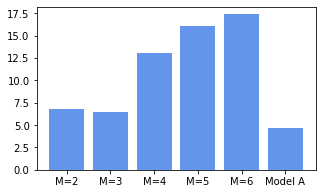

In [ ]:
def kfold_model_A(x, t, k):#model_A 교차검증
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
        mse_train[i] = mse_model_A(wm, x_train, t_train)
        mse_test[i] = mse_model_A(wm, x_test, t_test)
    return mse_train, mse_test

K = 16  #k=16일때
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD={0:.2f} cm".format(mean_Gauss_test[1]))
print("Model A SD={0:.2f} cm".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]
plt.figure(figsize=(5, 3))
plt.bar(M, SD, tick_label=label, align="center",
facecolor="cornflowerblue")
plt.show()


위 그래프 해석

*  model A의 성능이 가장 좋음을 확인할 수있다.
*   M=3일때 가장 성능이 좋다



>>결국 우리는 데이터셋에 대해 깊은 이해를 바탕으로 가장 적합한 모델을 만들 수 있어야한다.
>>또한 어떤 손실함수(목적함수)를 사용할지 결정하는것도 중요하다.